In [0]:
# Multiple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import files
uploaded = files.upload()

Saving CrimeMerged.csv to CrimeMerged.csv


In [0]:
#Read the file
narcotics = pd.read_csv('CrimeMerged.csv')

In [0]:
#Based on feature selection carried out, select only those features
best = narcotics[['geohash', 'Primary_Type', 'Year', 'Month', 'WEEKDAY', 'Holiday',
                     'Time', 'crimescount','Avg_Student_Attendance_Rate', 'Avg_Teacher_Attendance_Rate', 'Mobility_Rate_Pct', 'NearestPoliceDist', 'NearestRedCamDist',
                      'RedCamCount', 'SchoolCount', 'avgTemp', 'prcp','wind'
]]

In [0]:
#Convert the categorical columns to objects before performing one hot encoding
best.Month = best.Month.astype(object)
best.geohash = best.geohash.astype(object)
best.Year = best.Year.astype(object)
best.WEEKDAY = best.WEEKDAY.astype(object)
best.Holiday = best.Holiday.astype(object)
best.Time = best.Time.astype(object)


In [0]:
best.head()

,geohash,Primary_Type,Year,Month,WEEKDAY,Holiday,Time,crimescount,Avg_Student_Attendance_Rate,Avg_Teacher_Attendance_Rate,Mobility_Rate_Pct,NearestPoliceDist,NearestRedCamDist,RedCamCount,SchoolCount,avgTemp,prcp,wind
0,dp3sy,ASSAULT,2015,1,0,False,afternoon,3,92.83,94.57,26.88,4.16,3.93,0.0,5.0,59.418065,33.283226,34.589677
1,dp3sy,ASSAULT,2015,1,0,False,evening,3,92.83,94.57,26.88,4.16,3.93,0.0,5.0,59.418065,33.283226,34.589677
2,dp3sy,ASSAULT,2015,1,0,False,morning,2,92.83,94.57,26.88,4.16,3.93,0.0,5.0,59.418065,33.283226,34.589677
3,dp3sy,ASSAULT,2015,1,0,False,night,2,92.83,94.57,26.88,4.16,3.93,0.0,5.0,59.418065,33.283226,34.589677
4,dp3sy,ASSAULT,2015,1,1,False,evening,1,92.83,94.57,26.88,4.16,3.93,0.0,5.0,59.418065,33.283226,34.589677


In [0]:
#Scaling only on numerical columns
numericols = ['float64','int64']
numericbest = best.select_dtypes(include=numericols)
from sklearn.preprocessing import StandardScaler,OneHotEncoder
sc = MinMaxScaler()
NUM = sc.fit_transform(numericbest)

In [0]:
#One hot encoding for only categorical columns
ohe    = OneHotEncoder(sparse=False)
cat =  best.select_dtypes('object')
columns_to_encode = cat.columns
encoded_columns =    ohe.fit_transform(cat[columns_to_encode])

In [0]:
#Merge both categorical and numerical features
final_best = np.concatenate([NUM, encoded_columns], axis=1)

In [0]:
#Convert to dataframe as the above transformation led to arrays
final = pd.DataFrame(final_best)
final.shape

(33565, 86)

In [0]:
bestdf_dummies = pd.get_dummies(best)
final.columns = bestdf_dummies.columns

In [0]:
X = final.drop(columns='crimescount')
y = final.crimescount

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [0]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
#score=r2_score(y_test,y_pred)
print("R2 ",r2_score(y_test,y_pred))
print("MAE ", mean_absolute_error(y_test,y_pred))
print("MSE ",mean_squared_error(y_test,y_pred))
print("RMSE is",np.sqrt(mean_squared_error(y_test,y_pred))) 

R2  0.41036093095043813
MAE  0.025250471872647166
MSE  0.0019595689067099815
RMSE is 0.04426701827218524


In [0]:
y_pred

array([0.00500488, 0.06762695, 0.03283691, ..., 0.0357666 , 0.03112793,
       0.00439453])

In [0]:
residual = y_test-y_pred

In [0]:
residual

21377   -0.005005
13524    0.095164
32836   -0.001829
5997     0.001344
32601    0.029358
           ...   
642     -0.000488
28354   -0.021179
3004    -0.012511
6854     0.007632
33495   -0.004395
Name: crimescount, Length: 6713, dtype: float64

Text(0, 0.5, 'Predictions')

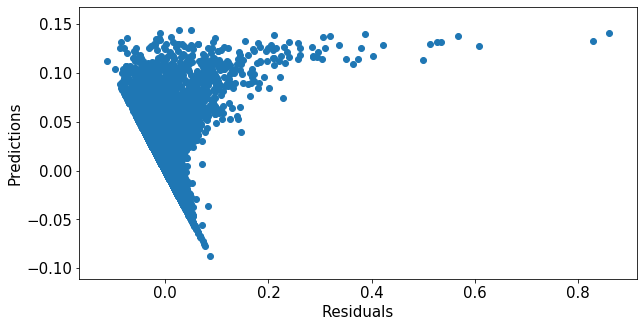

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.scatter(residual, y_pred)
# Set common labels
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_xlabel('Residuals', fontsize=15)
ax.set_ylabel('Predictions', fontsize=15)

#The residual vs predictions is clumped and the behaviour is not random, thus homoscedasticity assumption not satisfied

Text(0, 0.5, 'Expected Cumulative Probability')

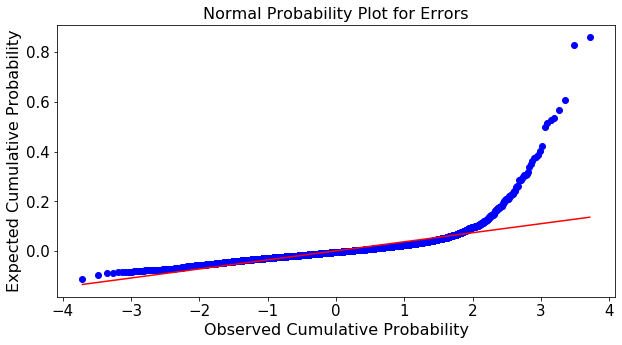

In [0]:
import scipy as sp
fig, ax = plt.subplots(figsize=(10,5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_title('Normal Probability Plot for Errors', fontsize=16)
ax.set_xlabel('Observed Cumulative Probability', fontsize=16)
ax.set_ylabel('Expected Cumulative Probability', fontsize=16)


#The residuals are non-linear and hence linear regression not a suitable model

In [0]:
np.random.seed(80)
X = final.drop(columns='crimescount').values
Y = final.crimescount.values
kfold = model_selection.KFold(n_splits=10, random_state=200, shuffle=True)
lrkf = LinearRegression()
results_kfoldlr = model_selection.cross_val_score(lrkf, X, Y, cv=kfold)
for train_index, test_index in kfold.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_trainkf, X_testkf = X[train_index], X[test_index]
    y_trainkf, y_testkf = Y[train_index], Y[test_index]
results_kfoldrlr= model_selection.cross_val_score(lrkf, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfoldlr.mean()*100.0)) 
clfrfthree = lrkf.fit(X_trainkf, y_trainkf)
kfoldlr = clfrfthree.predict(X_testkf)
print("RMSE is",np.sqrt(mean_squared_error(y_testkf,kfoldlr))) 
print("R2 ",r2_score(y_testkf, kfoldlr))
print("MAE ", mean_absolute_error(y_testkf, kfoldlr))
print("MSE ",mean_squared_error(y_testkf,kfoldlr))

TRAIN: [    0     1     2 ... 33562 33563 33564] TEST: [   16    21    45 ... 33521 33537 33544]
TRAIN: [    0     2     3 ... 33561 33563 33564] TEST: [    1     6     8 ... 33546 33551 33562]
TRAIN: [    0     1     2 ... 33562 33563 33564] TEST: [    9    24    28 ... 33531 33553 33555]
TRAIN: [    0     1     2 ... 33562 33563 33564] TEST: [   33    35    36 ... 33545 33552 33559]
TRAIN: [    0     1     2 ... 33562 33563 33564] TEST: [   20    26    32 ... 33510 33523 33530]
TRAIN: [    1     2     3 ... 33562 33563 33564] TEST: [    0     7    14 ... 33533 33540 33556]
TRAIN: [    0     1     3 ... 33560 33561 33562] TEST: [    2    11    25 ... 33557 33563 33564]
TRAIN: [    0     1     2 ... 33562 33563 33564] TEST: [   12    15    22 ... 33548 33554 33560]
TRAIN: [    0     1     2 ... 33562 33563 33564] TEST: [    4    23    42 ... 33543 33547 33558]
TRAIN: [    0     1     2 ... 33562 33563 33564] TEST: [    3     5    17 ... 33549 33550 33561]
Accuracy: 42.41%
RMSE is 0.043